# Deep Learning Indonesia.AI
Pertemuan - 7 Hyper Parameters (Callbacks)

# Import Library

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

plt.style.use('ggplot')

# Generate Data

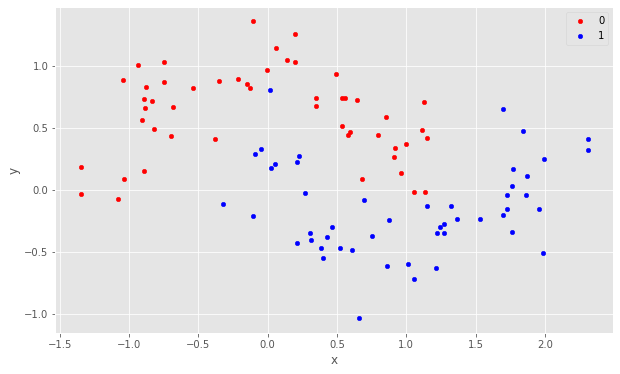

In [13]:
# generate 2d classification dataset

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(10,6))
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

# show plot
plt.show()

In [14]:
# split into train and test
n_train = 30
trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

# Create Simple MLP Model

In [15]:
def init_model():

    # define model
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Train Model

In [17]:
# init model
model = init_model()

# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=500, verbose=0)

In [18]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.967, Valid: 0.843


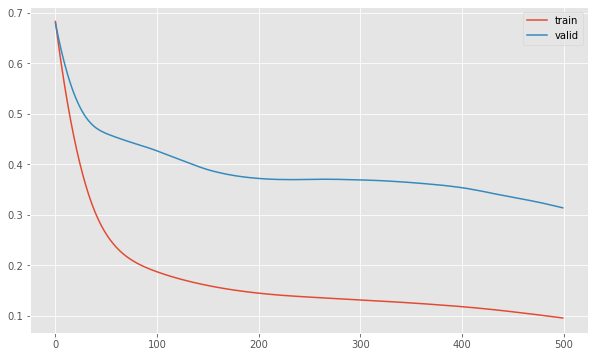

In [19]:
# plot training history
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Train Model (More Epoch)

In [20]:
# init model
model = init_model()

# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0)

In [21]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.914


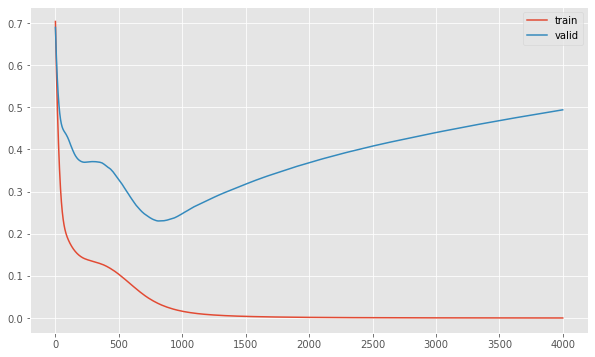

In [22]:
# plot training history
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Train Model (Overfit with Early Stopping)

In [23]:
# init model
model = init_model()

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es])

Epoch 00002: early stopping


In [24]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.633, Valid: 0.714


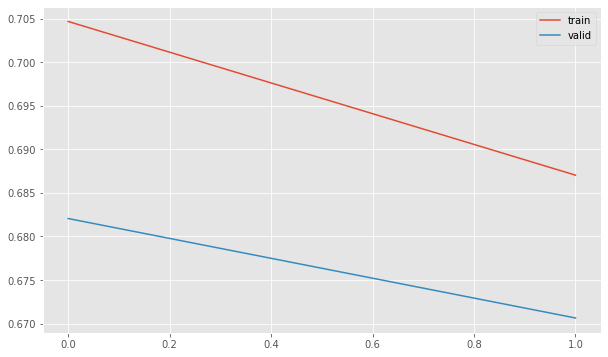

In [25]:
# plot training history
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Train Model (Overfit with Early Stopping, Patience)

In [26]:
# init model
model = init_model()

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es])

Epoch 00994: early stopping


In [27]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.943


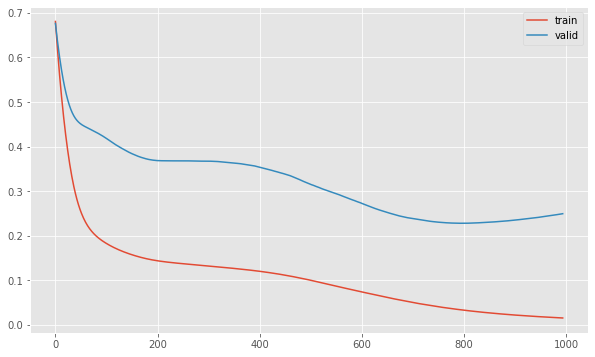

In [28]:
# plot training history
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

## Train Model (Overfit with Early Stopping, Patience, Model Checkpoint)

In [29]:
# init model
model = init_model()

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=4000, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.80000, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.80000

Epoch 00003: val_accuracy did not improve from 0.80000

Epoch 00004: val_accuracy did not improve from 0.80000

Epoch 00005: val_accuracy did not improve from 0.80000

Epoch 00006: val_accuracy did not improve from 0.80000

Epoch 00007: val_accuracy did not improve from 0.80000

Epoch 00008: val_accuracy did not improve from 0.80000

Epoch 00009: val_accuracy did not improve from 0.80000

Epoch 00010: val_accuracy did not improve from 0.80000

Epoch 00011: val_accuracy did not improve from 0.80000

Epoch 00012: val_accuracy did not improve from 0.80000

Epoch 00013: val_accuracy did not improve from 0.80000

Epoch 00014: val_accuracy did not improve from 0.80000

Epoch 00015: val_accuracy did not improve from 0.80000

Epoch 00016: val_accuracy did not improve from 0.80000

Epoch 00017: val_accuracy did not improve from 0.80000

Epoch 00018: va

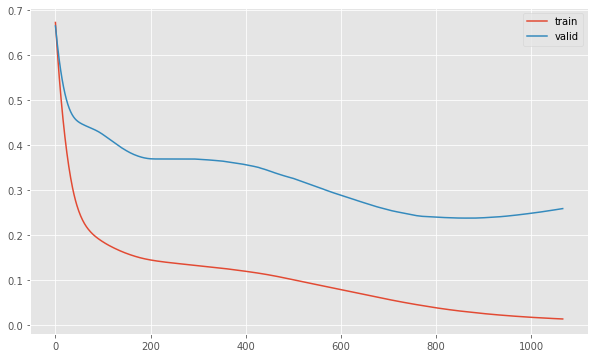

In [30]:
# plot training history
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()